### B. Classification

As mentioned in the Analysis task, one of the foremost factors that could influence the upcoming election is the rise of regionalism, and consequent alliances of national parties with regional parties. In this regard, there is also some degree of sentiment of lack of representation in the central government when it comes to many states, and this is why this could be an important factor. 
Hence, the classification problem identified pertaining to this dataset is to the classify whether a candidate belongs to a national party or not. 

Some of the features identified that could be potential determiners of this are year, state, incumbency, position and turnout percentage of the constituency. 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, f1_score, recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [67]:
# load data
all_years = pd.read_csv('All_States_GE.csv')
all_years['isNational'] = [1 if partytype == "National Party" else 0 for partytype in all_years.Party_Type_TCPD]
all_years

/tmp/ipykernel_3547/756232089.py:2: DtypeWarning: Columns (17,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  all_years = pd.read_csv('All_States_GE.csv')


,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,...,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Election_Type,isNational
0,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,1,KULDEEP RAI SHARMA,M,...,False,False,True,Graduate Professional,Business,NaN,Social Work,NaN,Lok Sabha Election (GE),1
1,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,2,VISHAL JOLLY,M,...,False,False,False,Graduate Professional,Liberal Profession or Professional,Lawyer,NaN,NaN,Lok Sabha Election (GE),1
2,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,3,PARITOSH KUMAR HALDAR,M,...,False,False,False,Post Graduate,Agriculture,NaN,NaN,NaN,Lok Sabha Election (GE),0
3,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,4,SANJAY MESHACK,M,...,False,False,True,12th Pass,Business,NaN,Politics,Municipality Member,Lok Sabha Election (GE),0
4,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,5,PRAKASH MINJ,M,...,False,False,False,Post Graduate,Social Work,NaN,NaN,NaN,Lok Sabha Election (GE),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91664,Mysore,3,23,1965,NaN,1,1,3,S.P.N.S.GAWDA,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE),1
91665,Uttar_Pradesh,3,76,1965,NaN,1,1,1,N.DEO,M,...,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE),1
91666,Uttar_Pradesh,3,76,1965,NaN,1,1,2,R.S.NIM,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE),0
91667,Uttar_Pradesh,3,76,1965,NaN,1,1,3,R.SINGH,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE),0


In [68]:
# features we will consider : year, position, state_name, incumbent, turnout
# target variable : isNational

# remove nota
all_years.drop(all_years[all_years['Candidate'] == 'NOTA'].index, inplace=True)
all_years


,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,...,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Election_Type,isNational
0,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,1,KULDEEP RAI SHARMA,M,...,False,False,True,Graduate Professional,Business,NaN,Social Work,NaN,Lok Sabha Election (GE),1
1,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,2,VISHAL JOLLY,M,...,False,False,False,Graduate Professional,Liberal Profession or Professional,Lawyer,NaN,NaN,Lok Sabha Election (GE),1
2,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,3,PARITOSH KUMAR HALDAR,M,...,False,False,False,Post Graduate,Agriculture,NaN,NaN,NaN,Lok Sabha Election (GE),0
3,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,4,SANJAY MESHACK,M,...,False,False,True,12th Pass,Business,NaN,Politics,Municipality Member,Lok Sabha Election (GE),0
4,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,5,PRAKASH MINJ,M,...,False,False,False,Post Graduate,Social Work,NaN,NaN,NaN,Lok Sabha Election (GE),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91664,Mysore,3,23,1965,NaN,1,1,3,S.P.N.S.GAWDA,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE),1
91665,Uttar_Pradesh,3,76,1965,NaN,1,1,1,N.DEO,M,...,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE),1
91666,Uttar_Pradesh,3,76,1965,NaN,1,1,2,R.S.NIM,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE),0
91667,Uttar_Pradesh,3,76,1965,NaN,1,1,3,R.SINGH,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE),0


In [69]:
hypo_inputs = ['State_Name', 'Year', 'Position', 'Turnout_Percentage', 'Incumbent', 'isNational']

all_years_reqd_col = all_years[hypo_inputs]

# all_years_reqd_col.dropna(inplace=True)
all_years.Turnout_Percentage.fillna(all_years.Turnout_Percentage.mean(), inplace=True)
all_years_reqd_col

,State_Name,Year,Position,Turnout_Percentage,Incumbent,isNational
0,Andaman_&_Nicobar_Islands,2019,1,65.09,False,1
1,Andaman_&_Nicobar_Islands,2019,2,65.09,False,1
2,Andaman_&_Nicobar_Islands,2019,3,65.09,False,0
3,Andaman_&_Nicobar_Islands,2019,4,65.09,False,0
4,Andaman_&_Nicobar_Islands,2019,5,65.09,False,0
...,...,...,...,...,...,...
91664,Mysore,1965,3,26.50,False,1
91665,Uttar_Pradesh,1965,1,17.56,False,1
91666,Uttar_Pradesh,1965,2,17.56,False,0
91667,Uttar_Pradesh,1965,3,17.56,False,0


In [70]:
# encode - year is label, and position is

sc = StandardScaler()
oh = OneHotEncoder()
le = LabelEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', sc, ['Position', 'Turnout_Percentage']),
        ('cat', oh, ['State_Name', 'Year', 'Incumbent'])
    ]
)

In [72]:
X = preprocessor.fit_transform(all_years.drop('isNational', axis=1))
y = all_years['isNational']
X = pd.DataFrame(X.toarray())
X.head(), y.head()

(         0         1    2    3    4    5    6    7    8    9   ...   87   88   
 0 -0.386613  0.031963  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  \
 1 -0.351726  0.031963  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
 2 -0.316840  0.031963  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
 3 -0.281954  0.031963  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
 4 -0.247068  0.031963  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
 
     89   90   91   92   93   94   95   96  
 0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  
 1  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  
 2  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  
 3  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  
 4  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  
 
 [5 rows x 97 columns],
 0    1
 1    1
 2    0
 3    0
 4    0
 Name: isNational, dtype: int64)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [74]:
def eval_model(y, y_hat, title = 'Confusion Matrix'):
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y, y_hat)
    f1 = f1_score(y, y_hat)

    print("Recall is: ", recall)
    print("Precision is: ", precision)
    print("Accuracy is: ", accuracy)
    print("F1 score is: ", f1)

    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'icefire', annot_kws = {'size': 20})

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title, fontsize = 15)

    plt.show()

def runModel(model):
    model.fit(X_train, y_train)
    y_val = model.predict(X_test)
    print(eval_model(y_test, y_val))


Recall is:  0.9428156748911466
Precision is:  0.5139240506329114
Accuracy is:  0.8205916250480215
F1 score is:  0.6652329749103942


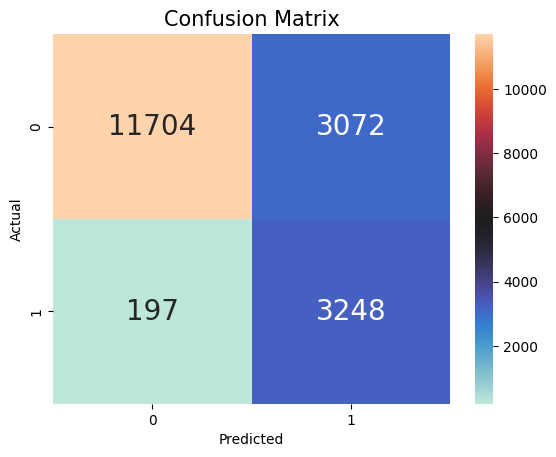

None


In [75]:
runModel(DecisionTreeClassifier(random_state=0, class_weight='balanced', max_depth=3, min_samples_leaf=5))

Recall is:  0.8084179970972424
Precision is:  0.7181536874677669
Accuracy is:  0.9037923275341638
F1 score is:  0.7606172333743001


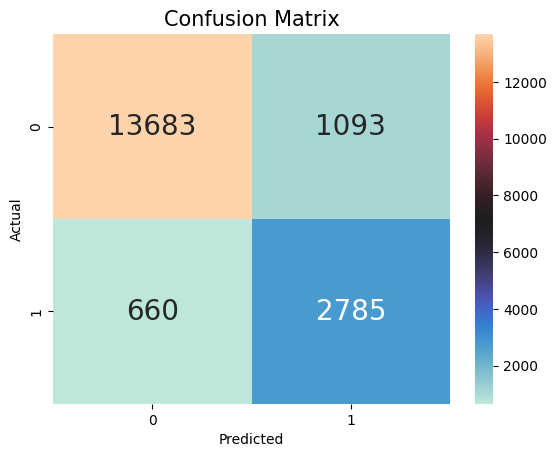

None


In [76]:
runModel(RandomForestClassifier(random_state=0, class_weight='balanced', max_depth = 30))

Overall, both the models are not very accurate, giving several false positives and false negatives. This points to insufficient data or less features. 

To truly improve such models, a much wider and more relevant dataset could be employed, which could give fairly useful results.